The model has coefficients of [-1.57e-02  1.66e-03  6.40e-03 -3.43e-06 -5.26e-03  8.54e-02 -3.42e-03
 -7.79e-05  3.74e-01 -1.66e-02] 
 The offset is 33.56
Average of training set in naive method is 18.946031750194464
Normalized Mean Absolute Error(NMAE): 0.11 ( 0.10505375967359024 )
Normalized Mean Absolute Error(NMAE) in naive method: 0.27 ( 0.2673974072428627 )


/Users/fanyuan/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


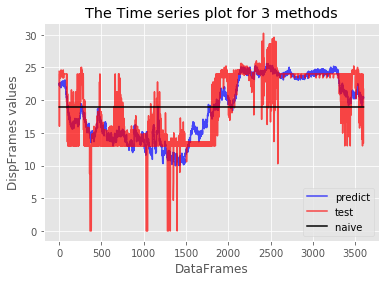

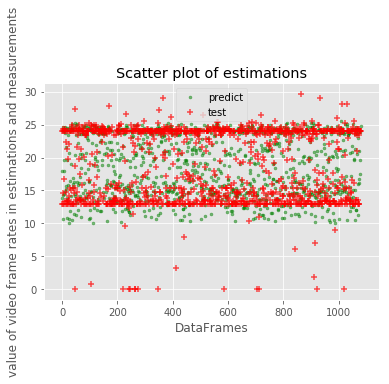

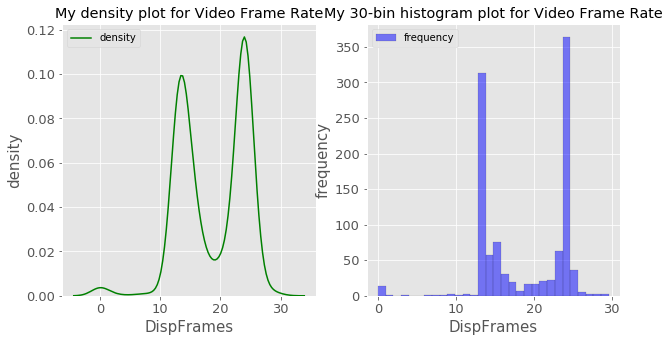

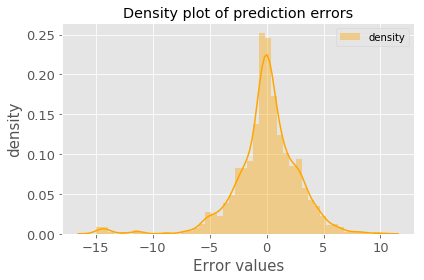

In [2]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split



# Read X,Y traces into pandas DataFrames named X,Y

train_data= pd.read_csv(r'/Users/fanyuan/EP2300_jupyter notebook/data/X.csv',usecols =[0,1,2,3,4,5,6,7,8,9])
data_Y = pd.read_csv(r'/Users/fanyuan/EP2300_jupyter notebook/data/Y.csv')

#sample devide in Linear Regression
Time = pd.read_csv(r'/Users/fanyuan/EP2300_jupyter notebook/data/X.csv',usecols =['TimeStamp']).values
train_target = data_Y['DispFrames']



X_train,X_test, Y_train, Y_test = train_test_split(train_data,train_target,test_size=0.3,train_size = 0.7, random_state=1) 


#simulation
model = LinearRegression()
model.fit(X_train,Y_train)

np.set_printoptions(precision=2)
a = model.intercept_
b = model.coef_
print ("The model has coefficients of",b,"\n The offset is %.2f"%a)

#For test set data, predict with predictor function
Y_pred = model.predict(X_test)
Y_pred_all = model.predict(train_data)
# Compute the normalized mean absoluted error of the model over the test set
Y_train_AVG = np.mean(Y_train)
Y_naive = np.array(Y_train_AVG).repeat(1080)
Y_test_AVG = np.mean(Y_test.values)
mae_test=np.sum(np.absolute(Y_test-Y_pred))/len(Y_test)
mae_test_n=np.sum(np.absolute(Y_test-Y_naive))/len(Y_test)
NMAE=(mae_test)/Y_test_AVG
NMAE_naive=(mae_test_n)/Y_train_AVG
print("Average of training set in naive method is",Y_train_AVG)
print("Normalized Mean Absolute Error(NMAE): %.2f" %NMAE, "(",NMAE,")")
print("Normalized Mean Absolute Error(NMAE) in naive method: %.2f" %NMAE_naive, "(",NMAE_naive,")")

plt.figure()
plt.title("The Time series plot for 3 methods")
plt.plot(range(len(train_target)),Y_pred_all,'b',label="predict",alpha=0.7)
plt.plot(range(len(train_target)),train_target ,'r',label="test",alpha=0.7)
plt.plot(range(len(train_target)),[Y_train_AVG,]*3600 ,'k',label="naive ")
plt.legend(loc=0)
plt.xlabel("DataFrames")
plt.ylabel("DispFrames values")

#Time series polt shows measurements and estimations
plt.figure('task2_scatter')
plt.title("Scatter plot of estimations")
plt.scatter(range(len(Y_pred)),Y_pred,marker = '.',color = 'g',label="predict",alpha=0.5)
plt.scatter(range(len(Y_test)),Y_test ,marker = '+',color = 'r',label="test",alpha=0.7)
plt.legend(loc=0)
plt.xlabel("DataFrames")
plt.ylabel('value of video frame rates in estimations and measurements')




#density plot & histogram for DispFrames
fig=plt.figure('Task2.1(d)',figsize=(10,5))
ax0=fig.add_subplot(1,2,1)
ax1=fig.add_subplot(1,2,2)
plt.style.use('ggplot')
#density plot
ax0.title.set_text('My density plot for Video Frame Rate')


ax0 = sns.kdeplot(Y_test, color ='g', label= 'density', ax=ax0)

font_size = 15
ax0.set_xlabel('DispFrames', fontsize=font_size)
ax0.set_ylabel('density', fontsize=font_size)
ax0.legend(loc=0)
ax0.tick_params(axis='both', which='major', labelsize=font_size-2)
ax0.tick_params(axis='both', which='minor', labelsize=font_size-4)
#histogram plot
ax1.title.set_text('My 30-bin histogram plot for Video Frame Rate')
ax1.hist(Y_test, bins = 30, edgecolor = 'k', color ='b', lw = 0.2, alpha = 0.5, label= 'frequency')

ax1.set_xlabel('DispFrames', fontsize=font_size)
ax1.set_ylabel('frequency', fontsize=font_size)
ax1.legend(loc=0)
ax1.tick_params(axis='both', which='major', labelsize=font_size-2)
ax1.tick_params(axis='both', which='minor', labelsize=font_size-4)

#density plot of prediction errors
predict_err=Y_test-Y_pred
plt.figure('task2_1(e)')
plt.title("Density plot of prediction errors")
sns.distplot(predict_err, color ='orange', label= 'density')
font_size = 15
plt.xlabel('Error values', fontsize=font_size)
plt.ylabel('density', fontsize=font_size)
plt.legend(loc=0)
plt.tick_params(axis='both', which='major', labelsize=font_size-2)
plt.tick_params(axis='both', which='minor', labelsize=font_size-4)
plt.tight_layout()
plt.show()



The six training sets are:  [-0.15779224  1.10838884 -0.68149648  1.49199141  0.0851729   0.64276593]
Normalized Mean Absolute Error(NMAE) for train size:  50 is : 0.11 ( 0.11173685334845512 )
Normalized Mean Absolute Error(NMAE) for train size:  100 is : 0.11 ( 0.10911477760618228 )
Normalized Mean Absolute Error(NMAE) for train size:  200 is : 0.11 ( 0.10807893264714397 )
Normalized Mean Absolute Error(NMAE) for train size:  500 is : 0.11 ( 0.10636910508542098 )
Normalized Mean Absolute Error(NMAE) for train size:  1000 is : 0.11 ( 0.10550005779900312 )
Normalized Mean Absolute Error(NMAE) for train size:  2520 is : 0.11 ( 0.10505375967359017 )
[-0.67436526 -0.94971228 -1.37597598 -0.04799466  1.19434286  0.76897833
 -0.40822357 -1.72501478 -0.91499058  0.83315032 -0.05527093 -0.70062695
  0.94979705  0.32937289  1.20989768 -0.8233936  -1.10446446 -0.58180906
  0.98410127 -1.54060641 -0.26742695  0.0358186   0.82421271 -2.57545939
  0.03127965 -2.16459596 -0.03691906 -0.56174844 -0.0

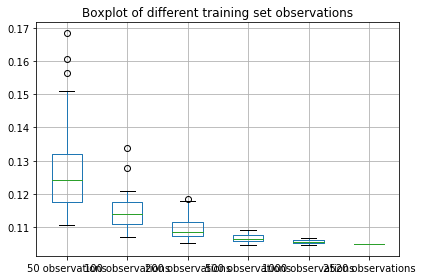

In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split


train_size =[50,100,200,500,1000,2520]
# Read X,Y traces into pandas DataFrames named X,Y

train_data= pd.read_csv('data/X.csv',usecols =[0,1,2,3,4,5,6,7,8,9])
data_Y = pd.read_csv('data/Y.csv')

#sample devide in Linear Regression
Time = pd.read_csv(r'/Users/fanyuan/EP2300_jupyter notebook/data/X.csv',usecols =['TimeStamp']).values
train_target = data_Y['DispFrames']

X_train,X_test, Y_train, Y_test = train_test_split(train_data,train_target,test_size=0.3,train_size = 0.7, random_state=1) 

#convert NMAE calculation into function
def NMAE_function(size,x,y):
	x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=(2520-size),random_state=1)
	linear_model= LinearRegression()
	model=linear_model.fit(x_train,y_train)
	y_pred=linear_model.predict(X_test)
	# the y_average should be compute based on the y(i) of test set
	y_avg=np.mean(Y_test.values)
	mae_test=np.sum(np.absolute(y_pred-Y_test))/len(Y_test)
	NMAE=(mae_test)/y_avg
	print ("Normalized Mean Absolute Error(NMAE) for train size: ",size, "is : %.2f" %NMAE, "(",NMAE,")")
	return NMAE


#six training sets

NList = np.random.randn(6)
print("The six training sets are: ",NList)
for i in range(len(train_size)):
    NList[i]=NMAE_function(train_size[i],X_train,Y_train)



#train the models for 50 different subsets

def NMAE_50(size,x,y,times):
	x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=(2520-size),random_state=times)
	linear_model= LinearRegression()
	model=linear_model.fit(x_train,y_train)
	y_pred=linear_model.predict(X_test)
	y_avg=np.mean(Y_test.values)
	mae_test=np.sum(np.absolute(y_pred-Y_test))/len(Y_test)
	NMAE=(mae_test)/y_avg
	return NMAE

#perform 50 times	
A=np.random.randn(50)
B=np.random.randn(50)
C=np.random.randn(50)
D=np.random.randn(50)
E=np.random.randn(50)
F=np.random.randn(50)

for x in range(50):
	for i in range(len(train_size)):
		NList[i]=NMAE_50(train_size[i],X_train,Y_train,x)
		A[x]=NList[0]
		B[x]=NList[1]
		C[x]=NList[2]
		D[x]=NList[3]
		E[x]=NList[4]
		F[x]=NList[5]



NList={"50 observations" : A, "100 observations" : B,
       "200 observations" : C, "500 observations" : D,
       "1000 observations" : E, "2520 observations" : F }

data=pd.DataFrame(NList)
plt.figure('task2_box')
#ax0=fig.add_subplot(1,2,1)
#ax1=fig.add_subplot(1,2,2)
bp=data.boxplot()
 
plt.title('Boxplot of different training set observations')
#todo: learn how to draw the error bar plot
plt.tight_layout()
plt.show()
